In [0]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
!ls "gdrive/My Drive/Skripsi 2"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
'Base 1'  'Base 2'  'Base 3'  'Label All Base.csv'


In [0]:
!pip install git+git://github.com/albertbup/deep-belief-network.git@master_gpu
!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git
print(__doc__)
from PIL import Image
import natsort
import numpy as np
import pandas as pd
import tensorflow as tf
from os import listdir
import cv2
from matplotlib import pyplot as plt
import skimage.io as io
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
from dbn.tensorflow import SupervisedDBNClassification
from skimage.feature import hog
from skimage import data, exposure
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from imblearn.over_sampling import SMOTE,ADASYN


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  Cloning git://github.com/albertbup/deep-belief-network.git (to revision master_gpu) to /tmp/pip-req-build-qozbno8f
  Running command git clone -q git://github.com/albertbup/deep-belief-network.git /tmp/pip-req-build-qozbno8f
  Running command git checkout -b master_gpu --track origin/master_gpu
  Switched to a new branch 'master_gpu'
  Branch 'master_gpu' set up to track remote branch 'master_gpu' from 'origin'.
     |████████████████████████████████| 377.0MB 45kB/s 
  Created wheel for deep-belief-network: filename=deep_belief_network-1.0.3-cp36-none-any.whl size=13464 sha256=0492a4755f40e56d1725c9a271eec3ac2fe1ccf707fe0226a970b20ebdea2bb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-7eeyhgwr/wheels/fe/5a/c7/18fc337ca5590a8b7c74c17ddba7a63935ce7a5bafb6cdec02
Successfully built deep-belief-network
  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-c9p2n5kc
  Running command git clone -q https://github.com/scikit-learn-contrib/imbalanced-

W0823 03:02:31.142005 139786456160128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:19: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

Using TensorFlow backend.


In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [0]:
# daftar label
labelAll= pd.read_csv('gdrive/My Drive/Skripsi 2/Label All Base.csv')
labelB1= pd.read_csv('gdrive/My Drive/Skripsi 2/Base 1/Label Base 1.csv')
labelB2= pd.read_csv('gdrive/My Drive/Skripsi 2/Base 2/Label Base 2.csv')
labelB3= pd.read_csv('gdrive/My Drive/Skripsi 2/Base 3/Label Base 3.csv')
# daftar citra yang diurutkan
pathB1= 'gdrive/My Drive/Skripsi 2/Base 1/Messidor/'
pathB2= 'gdrive/My Drive/Skripsi 2/Base 2/Messidor/'
pathB3= 'gdrive/My Drive/Skripsi 2/Base 3/Messidor/'
dirB1= natsort.natsorted(listdir(pathB1))
dirB2= natsort.natsorted(listdir(pathB2))
dirB3= natsort.natsorted(listdir(pathB3))
# hapus citra yang error
available_image1= set(dirB1).intersection(set(labelB1['Name']))
available_image2= set(dirB2).intersection(set(labelB2['Name']))
available_image3= set(dirB3).intersection(set(labelB3['Name']))

In [0]:
# list citra
images = []

i=1
#persentase ukuran gambar yang diinginkan
skala=25 #persen

print('==================================================')
print('Mulai Preprocessing dan Segmentasi data Base 1!')
print('==================================================')
for img in dirB1:
    # buka citra
    im1 = cv2.imread(pathB1 + img,0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    histeq1=clahe.apply(im1)
    preprocess1= cv2.fastNlMeansDenoising(histeq1,None,5,7,21)
    closing1 = cv2.morphologyEx(preprocess1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)))
    th1= cv2.adaptiveThreshold(closing1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,2)
    
    #cropping
    garis1 = cv2.Canny(im1, 20, 120)
    dil1 = cv2.dilate(garis1,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)),iterations = 1)
    pts1 = np.argwhere(dil1>0)
    y11,x11 = pts1.min(axis=0)
    y21,x21 = pts1.max(axis=0)
    crop1 = th1[y11:y21, x11:x21]

    shr1= cv2.resize(crop1, (1388, 1388), interpolation = cv2.INTER_AREA)
    fd1, hog_image1 = hog(shr1, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    data1= np.array(fd1)
    #ubah ukuran citra menjadi (3*256*256)
    flattened1 = data1.flatten() 
    # tambahkan citra ke list
    images.append(flattened1) 
    print("Preprocessing dan Segmentasi Data Base 1...",(i,len(dirB1)))
    i=i+1
print('Preprocessing dan Segmentasi Data Base 1 Selesai!')

Mulai Preprocessing dan Segmentasi data Base 1!
Preprocessing dan Segmentasi Data Base 1... (1, 400)
Preprocessing dan Segmentasi Data Base 1... (2, 400)
Preprocessing dan Segmentasi Data Base 1... (3, 400)
Preprocessing dan Segmentasi Data Base 1... (4, 400)
Preprocessing dan Segmentasi Data Base 1... (5, 400)
Preprocessing dan Segmentasi Data Base 1... (6, 400)
Preprocessing dan Segmentasi Data Base 1... (7, 400)
Preprocessing dan Segmentasi Data Base 1... (8, 400)
Preprocessing dan Segmentasi Data Base 1... (9, 400)
Preprocessing dan Segmentasi Data Base 1... (10, 400)
Preprocessing dan Segmentasi Data Base 1... (11, 400)
Preprocessing dan Segmentasi Data Base 1... (12, 400)
Preprocessing dan Segmentasi Data Base 1... (13, 400)
Preprocessing dan Segmentasi Data Base 1... (14, 400)
Preprocessing dan Segmentasi Data Base 1... (15, 400)
Preprocessing dan Segmentasi Data Base 1... (16, 400)
Preprocessing dan Segmentasi Data Base 1... (17, 400)
Preprocessing dan Segmentasi Data Base 1...

In [0]:
j=1
print('==================================================')
print('Mulai Preprocessing dan Segmentasi Data Base 2!')
print('==================================================')
for img in dirB2:
    # buka citra
    im2 = cv2.imread(pathB2 + img,0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    histeq2=clahe.apply(im2)
    preprocess2= cv2.fastNlMeansDenoising(histeq2,None,5,7,21)
    closing2 = cv2.morphologyEx(preprocess2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)))
    th2= cv2.adaptiveThreshold(closing2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,2)
    #cropping
    garis2 = cv2.Canny(im2, 20, 120)
    dil2 = cv2.dilate(garis2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)),iterations = 1)
    pts2 = np.argwhere(dil2>0)
    y12,x12 = pts2.min(axis=0)
    y22,x22 = pts2.max(axis=0)
    crop2 = th2[y12:y22, x12:x22]
    
    shr2= cv2.resize(crop2, (1388,1388), interpolation = cv2.INTER_AREA)
    fd2, hog_image2 = hog(shr2, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    data2= np.array(fd2)
    #ubah ukuran citra menjadi (3*256*256)
    flattened2 = data2.flatten() 
    # tambahkan citra ke list
    images.append(flattened2) 
    print("Preprocessing dan Segmentasi Data Base 2...",(j,len(dirB2)))
    j=j+1
print('Preprocessing dan Segmentasi Data Base 2 Selesai!')

Mulai Preprocessing dan Segmentasi Data Base 2!
Preprocessing dan Segmentasi Data Base 2... (1, 400)
Preprocessing dan Segmentasi Data Base 2... (2, 400)
Preprocessing dan Segmentasi Data Base 2... (3, 400)
Preprocessing dan Segmentasi Data Base 2... (4, 400)
Preprocessing dan Segmentasi Data Base 2... (5, 400)
Preprocessing dan Segmentasi Data Base 2... (6, 400)
Preprocessing dan Segmentasi Data Base 2... (7, 400)
Preprocessing dan Segmentasi Data Base 2... (8, 400)
Preprocessing dan Segmentasi Data Base 2... (9, 400)
Preprocessing dan Segmentasi Data Base 2... (10, 400)
Preprocessing dan Segmentasi Data Base 2... (11, 400)
Preprocessing dan Segmentasi Data Base 2... (12, 400)
Preprocessing dan Segmentasi Data Base 2... (13, 400)
Preprocessing dan Segmentasi Data Base 2... (14, 400)
Preprocessing dan Segmentasi Data Base 2... (15, 400)
Preprocessing dan Segmentasi Data Base 2... (16, 400)
Preprocessing dan Segmentasi Data Base 2... (17, 400)
Preprocessing dan Segmentasi Data Base 2...

In [0]:
k=1
print('==================================================')
print('Mulai Preprocessing dan Segmentasi data Base 3!')
print('==================================================')
for img in dirB3:
    # buka citra
    im3 = cv2.imread(pathB3 + img,0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    histeq3=clahe.apply(im3)
    preprocess3= cv2.fastNlMeansDenoising(histeq3,None,5,7,21)
    closing3 = cv2.morphologyEx(preprocess3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)))
    th3= cv2.adaptiveThreshold(closing3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,2)
    #cropping
    garis3 = cv2.Canny(im3, 20, 120)
    dil3 = cv2.dilate(garis3,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12)),iterations = 1)
    pts3 = np.argwhere(dil3>0)
    y13,x13 = pts3.min(axis=0)
    y23,x23 = pts3.max(axis=0)
    crop3 = th3[y13:y23, x13:x23]
    
    shr3= cv2.resize(crop3, (1388,1388), interpolation = cv2.INTER_AREA)
    fd3, hog_image3 = hog(shr3, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    data3= np.array(fd3)
    #ubah ukuran citra menjadi (3*256*256)
    flattened3 = data3.flatten() 
    # tambahkan citra ke list
    images.append(flattened3) 
    print("Preprocessing dan Segmentasi Data Base 3...",(k,len(dirB3)))
    k=k+1
print('Preprocessing dan Segmentasi Data Base 3 Selesai!')

Mulai Preprocessing dan Segmentasi data Base 3!
Preprocessing dan Segmentasi Data Base 3... (1, 400)
Preprocessing dan Segmentasi Data Base 3... (2, 400)
Preprocessing dan Segmentasi Data Base 3... (3, 400)
Preprocessing dan Segmentasi Data Base 3... (4, 400)
Preprocessing dan Segmentasi Data Base 3... (5, 400)
Preprocessing dan Segmentasi Data Base 3... (6, 400)
Preprocessing dan Segmentasi Data Base 3... (7, 400)
Preprocessing dan Segmentasi Data Base 3... (8, 400)
Preprocessing dan Segmentasi Data Base 3... (9, 400)
Preprocessing dan Segmentasi Data Base 3... (10, 400)
Preprocessing dan Segmentasi Data Base 3... (11, 400)
Preprocessing dan Segmentasi Data Base 3... (12, 400)
Preprocessing dan Segmentasi Data Base 3... (13, 400)
Preprocessing dan Segmentasi Data Base 3... (14, 400)
Preprocessing dan Segmentasi Data Base 3... (15, 400)
Preprocessing dan Segmentasi Data Base 3... (16, 400)
Preprocessing dan Segmentasi Data Base 3... (17, 400)
Preprocessing dan Segmentasi Data Base 3...

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# masukan model
X= np.array(images)        
Y= np.array(labelAll.Grade)
# split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_sm,y_sm=SMOTE().fit_resample(x_train,y_train)
# object pelatihan model
classifier = SupervisedDBNClassification(hidden_layers_structure=[256,256],
                                         learning_rate_rbm=0.01,
                                         learning_rate=0.01,
                                         n_epochs_rbm=100,
                                         n_iter_backprop=1000,
                                         batch_size=64,
                                         activation_function='sigmoid',
                                         dropout_p=0.5)

#scores = []
#folds = StratifiedKFold(n_splits=10)
#for train_index, test_index in folds.split(x_train,y_train):
    #print("Index Data Training = ",train_index)
    #print("Index Data Testing = ",test_index)
    #xtr, xts, ytr, yts = x_train[train_index], x_train[test_index],y_train[train_index], y_train[test_index]
    #classifier.fit(xtr, ytr)
    #scores.append(classifier.score(xts, yts))

#scoreout=cross_val_score(classifier, digits.data, digits.target,cv=7)
#rerata=np.average(scores)
#print("Score Model = ",rerata)

#latih model
classifier.fit(x_sm,y_sm)

W0823 05:10:46.315054 139786456160128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:121: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0823 05:10:46.375352 139786456160128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:143: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 05:10:46.389368 139786456160128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:149: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 05:10:46.398832 139786456160128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:150: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0823 05:10:46.430119 139786456160128 deprecation_w

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 9243.274714
>> Epoch 2 finished 	RBM Reconstruction error 6851.051555
>> Epoch 3 finished 	RBM Reconstruction error 5250.785030
>> Epoch 4 finished 	RBM Reconstruction error 4503.500144
>> Epoch 5 finished 	RBM Reconstruction error 4123.062747
>> Epoch 6 finished 	RBM Reconstruction error 3902.580584
>> Epoch 7 finished 	RBM Reconstruction error 3737.510244
>> Epoch 8 finished 	RBM Reconstruction error 3510.014372
>> Epoch 9 finished 	RBM Reconstruction error 3243.464698
>> Epoch 10 finished 	RBM Reconstruction error 2983.168074
>> Epoch 11 finished 	RBM Reconstruction error 2756.258612
>> Epoch 12 finished 	RBM Reconstruction error 2518.020847
>> Epoch 13 finished 	RBM Reconstruction error 2325.607844
>> Epoch 14 finished 	RBM Reconstruction error 2217.979359
>> Epoch 15 finished 	RBM Reconstruction error 2135.913961
>> Epoch 16 finished 	RBM Reconstruction error 2055.193430
>> Epoch 17 finished 	RBM Reconstructi

W0823 05:23:58.622019 139786456160128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:338: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0823 05:23:58.676169 139786456160128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/dbn/tensorflow/models.py:357: The name tf.train.GradientDescentOptimizer is deprecated. Please use tf.compat.v1.train.GradientDescentOptimizer instead.



>> Epoch 100 finished 	RBM Reconstruction error 5.506944
[END] Pre-training step
[START] Fine tuning step:
>> Epoch 0 finished 	ANN training loss 1.363692
>> Epoch 1 finished 	ANN training loss 1.333263
>> Epoch 2 finished 	ANN training loss 1.316519
>> Epoch 3 finished 	ANN training loss 1.300184
>> Epoch 4 finished 	ANN training loss 1.287947
>> Epoch 5 finished 	ANN training loss 1.277185
>> Epoch 6 finished 	ANN training loss 1.270896
>> Epoch 7 finished 	ANN training loss 1.263441
>> Epoch 8 finished 	ANN training loss 1.259739
>> Epoch 9 finished 	ANN training loss 1.254367
>> Epoch 10 finished 	ANN training loss 1.251795
>> Epoch 11 finished 	ANN training loss 1.244084
>> Epoch 12 finished 	ANN training loss 1.240798
>> Epoch 13 finished 	ANN training loss 1.236718
>> Epoch 14 finished 	ANN training loss 1.236563
>> Epoch 15 finished 	ANN training loss 1.234067
>> Epoch 16 finished 	ANN training loss 1.230170
>> Epoch 17 finished 	ANN training loss 1.227036
>> Epoch 18 finished 

SupervisedDBNClassification(batch_size=64, dropout_p=0.5,
                            idx_to_label_map={0: 1, 1: 0, 2: 2, 3: 3},
                            l2_regularization=1.0,
                            label_to_idx_map={0: 1, 1: 0, 2: 2, 3: 3},
                            learning_rate=0.01, n_iter_backprop=1000,
                            verbose=True)

Skor =  0.4375
Done.
Accuracy: 0.437500
              precision    recall  f1-score   support

           0       0.56      0.51      0.53       117
           1       0.31      0.18      0.23        28
           2       0.33      0.18      0.23        45
           3       0.35      0.64      0.45        50

    accuracy                           0.44       240
   macro avg       0.39      0.38      0.36       240
weighted avg       0.44      0.44      0.42       240

Confusion matrix, without normalization
[[60  8 11 38]
 [14  5  2  7]
 [19  3  8 15]
 [15  0  3 32]]
Normalized confusion matrix
[[0.51 0.07 0.09 0.32]
 [0.5  0.18 0.07 0.25]
 [0.42 0.07 0.18 0.33]
 [0.3  0.   0.06 0.64]]


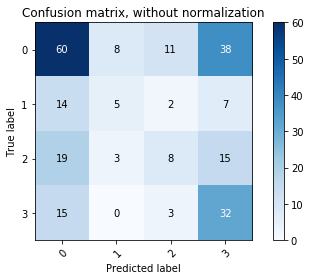

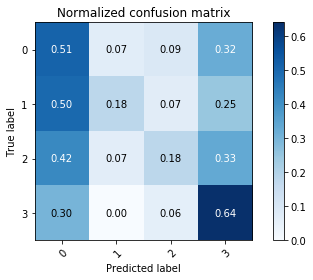

In [0]:
# simpan model
classifier.save('model.pkl')
# load model
#classifier = SupervisedDBNClassification.load('model.pkl')

#score
Nilai_model=classifier.score(x_test, y_test)
print("Skor = ",Nilai_model)
#plot=classifier.proof()

#akurasi
y_pred=classifier.predict(x_test)
print('Done.\nAccuracy: %f' % accuracy_score(y_test, y_pred))

#presisi, F1 score, recall
print(classification_report(y_test, y_pred))

#confusion matrix
np.set_printoptions(precision=2)
class_names = ['0','1','2','3']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()